<a href="https://colab.research.google.com/github/ShivM99/Python/blob/main/Taxi_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

**Importing the dataset**

In [178]:
data = pd.read_csv ('nyc_taxi_trip_duration.csv')
data.shape

(729322, 11)

**Handling the date-time data**

In [179]:
data['pickup_datetime'] = pd.to_datetime (data['pickup_datetime'], format = '%d-%m-%Y %H:%M')
data['dropoff_datetime'] = pd.to_datetime (data['dropoff_datetime'], format = '%d-%m-%Y %H:%M')

data['check_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map (lambda x: x.total_seconds())

duration_difference = data[np.abs (data['check_trip_duration'].values  - data['trip_duration'].values) > 1]
duration_difference.shape

(693032, 12)

**Extracting important features from the 'pickup_datetime'**

In [180]:
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_day']

0         29
1         11
2         21
3          5
4         17
          ..
729317    21
729318    22
729319    15
729320    19
729321     1
Name: pickup_day, Length: 729322, dtype: int64

In [181]:
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_month']

0         2
1         3
2         2
3         1
4         2
         ..
729317    5
729318    2
729319    4
729320    6
729321    1
Name: pickup_month, Length: 729322, dtype: int64

In [182]:
data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek
data['pickup_dayofweek']

0         0
1         4
2         6
3         1
4         2
         ..
729317    5
729318    0
729319    4
729320    6
729321    4
Name: pickup_dayofweek, Length: 729322, dtype: int64

In [183]:
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_hour']

0         16
1         23
2         17
3          9
4          6
          ..
729317    13
729318     0
729319    18
729320     9
729321    17
Name: pickup_hour, Length: 729322, dtype: int64

In [184]:
data['pickup_minute'] = data['pickup_datetime'].dt.minute
data['pickup_minute']

0         40
1         35
2         59
3         44
4         42
          ..
729317    29
729318    43
729319    56
729320    50
729321    24
Name: pickup_minute, Length: 729322, dtype: int64

**Log transforming the 'trip_duration' as it is positively skewed and we want it to be normally distributed**

In [185]:
data['log_trip_duration'] = np.log (data['trip_duration'].values + 1)

In [186]:
data.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag             object
trip_duration                   int64
check_trip_duration           float64
pickup_day                      int64
pickup_month                    int64
pickup_dayofweek                int64
pickup_hour                     int64
pickup_minute                   int64
log_trip_duration             float64
dtype: object

**Seggregating the features (x) from the target variable (y)**

In [187]:
x = data.iloc[:, [1, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16]].values
x_df = pd.DataFrame (x, columns = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'pickup_day', 'pickup_month', 'pickup_dayofweek', 'pickup_hour', 'pickup_minute'])
x_df

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_dayofweek,pickup_hour,pickup_minute
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,29,2,0,16,40
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,11,3,4,23,35
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,21,2,6,17,59
3,2,6,-73.96167,40.75972,-73.956779,40.780628,N,5,1,1,9,44
4,1,1,-74.01712,40.708469,-73.988182,40.740631,N,17,2,2,6,42
...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2,-73.965919,40.78978,-73.952637,40.789181,N,21,5,5,13,29
729318,1,1,-73.996666,40.737434,-74.00132,40.731911,N,22,2,0,0,43
729319,1,1,-73.997849,40.761696,-74.001488,40.741207,N,15,4,4,18,56
729320,1,1,-74.006706,40.708244,-74.01355,40.713814,N,19,6,6,9,50


In [188]:
y = data.iloc[:, 17].values
y_df = pd.DataFrame (y, columns = ['log_trip_duration'])
y_df

,log_trip_duration
0,5.993961
1,7.003974
2,7.400010
3,7.040536
4,6.744059
...,...
729317,5.693732
729318,5.755742
729319,6.513230
729320,6.104793


**Checking for missing values in the dataset**

In [189]:
data.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
check_trip_duration    0
pickup_day             0
pickup_month           0
pickup_dayofweek       0
pickup_hour            0
pickup_minute          0
log_trip_duration      0
dtype: int64

**One hot encoding the categorical features**

In [190]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer (transformers = [('ohe', OneHotEncoder (), [0, 6])], remainder = 'passthrough')
x = ct.fit_transform (x)
x

array([[0.0, 1.0, 1.0, ..., 0, 16, 40],
       [1.0, 0.0, 1.0, ..., 4, 23, 35],
       [0.0, 1.0, 1.0, ..., 6, 17, 59],
       ...,
       [1.0, 0.0, 1.0, ..., 4, 18, 56],
       [1.0, 0.0, 1.0, ..., 6, 9, 50],
       [0.0, 1.0, 1.0, ..., 4, 17, 24]], dtype=object)

In [191]:
x_df.dtypes

vendor_id             object
passenger_count       object
pickup_longitude      object
pickup_latitude       object
dropoff_longitude     object
dropoff_latitude      object
store_and_fwd_flag    object
pickup_day            object
pickup_month          object
pickup_dayofweek      object
pickup_hour           object
pickup_minute         object
dtype: object

**Splitting the dataset into train & test**

In [192]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 0, shuffle = True)

**Scaling the features after splitting to prevent data leakage**

In [193]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler ()
x_train = sc.fit_transform (x_train)
x_test = sc.transform (x_test)

**Building the linear regression model**

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr = LinearRegression ()

**Training the model and predicting the x_test**

In [195]:
lr.fit (x_train, y_train)
y_pred = lr.predict (x_test)
np.concatenate ((y_test.reshape (-1, 1), y_pred.reshape (-1, 1)), axis = 1)

array([[6.51323011, 6.49644746],
       [7.07580886, 6.53204802],
       [6.36647045, 6.36449538],
       ...,
       [7.07411682, 6.50920886],
       [6.22455843, 6.34405604],
       [7.81439963, 5.97240144]])

**Calculating the error**

In [196]:
err = sqrt (mse (y_test, y_pred))
err

0.7782388849250498

**Interpreting the coefficients of linear model**

In [197]:
lr.coef_

array([ 1.57791435e+09,  1.57791435e+09, -3.80666207e+11, -3.80666207e+11,
        1.22624040e-02,  1.03668597e-01, -8.19364982e-02, -8.36760085e-03,
       -6.98524462e-02,  7.38489846e-03,  3.73440068e-02, -2.32756926e-02,
        2.92832721e-02, -6.32137345e-03])

In [198]:
Coefficients = pd.DataFrame({'Variable': x_df.columns, 'Coefficient': [lr.coef_[0], lr.coef_[2], lr.coef_[4], lr.coef_[5], lr.coef_[6], lr.coef_[7], lr.coef_[8], lr.coef_[9], lr.coef_[10], lr.coef_[11], lr.coef_[12], lr.coef_[13]]})
Coefficients

,Variable,Coefficient
0,vendor_id,1.577914e+09
1,passenger_count,-3.806662e+11
2,pickup_longitude,1.226240e-02
3,pickup_latitude,1.036686e-01
4,dropoff_longitude,-8.193650e-02
5,dropoff_latitude,-8.367601e-03
6,store_and_fwd_flag,-6.985245e-02
7,pickup_day,7.384898e-03
8,pickup_month,3.734401e-02
9,pickup_dayofweek,-2.327569e-02


Text(0.5, 1.0, 'Coefficient plot')

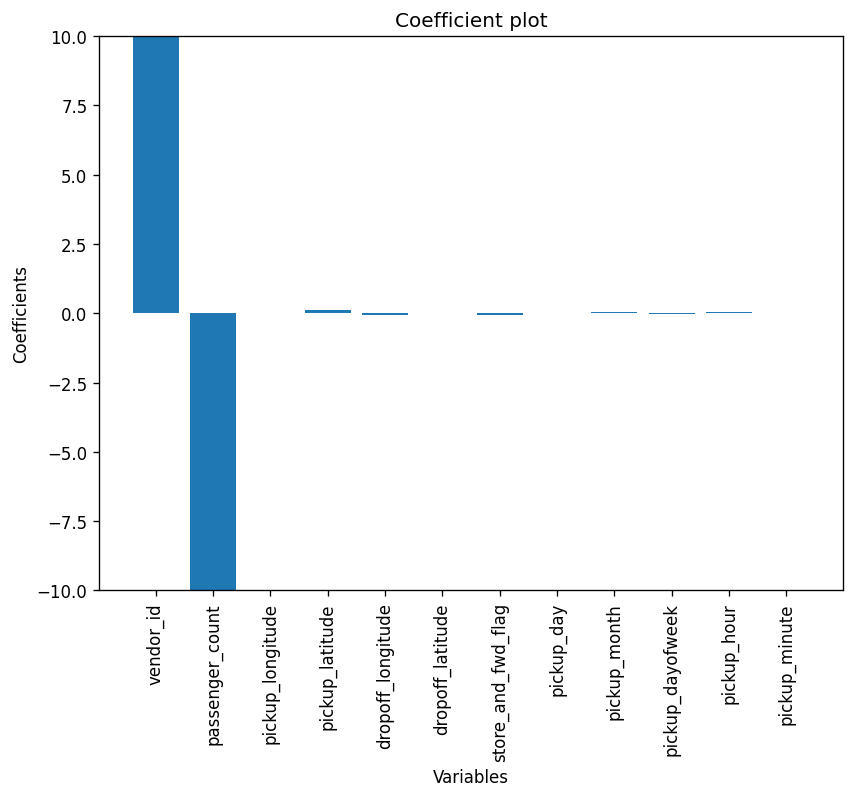

In [199]:
plt.figure (figsize = (8, 6), dpi = 120, facecolor = 'w', edgecolor = 'b')
x_axis = x_df.columns
y_axis = [lr.coef_[0], lr.coef_[2], lr.coef_[4], lr.coef_[5], lr.coef_[6], lr.coef_[7], lr.coef_[8], lr.coef_[9], lr.coef_[10], lr.coef_[11], lr.coef_[12], lr.coef_[13]]
plt.bar (x_axis, y_axis)
plt.xticks (rotation = 90)
plt.xlabel ('Variables')
plt.ylabel ('Coefficients')
plt.ylim (-10, 10)
plt.title ('Coefficient plot')

**We see that 'vendor_id' & 'passenger_count' have huge coefficients and thus, need to be regularised**

**Checking the spread of residuals**

In [200]:
residuals = pd.DataFrame ({'fitted values': y_test, 'predicted values': y_pred,})
residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
0,6.513230,6.496447,0.016783
1,7.075809,6.532048,0.543761
2,6.366470,6.364495,0.001975
3,6.762730,6.459319,0.303410
4,6.188264,6.245888,-0.057624


In [201]:
residuals.shape[0]

145865

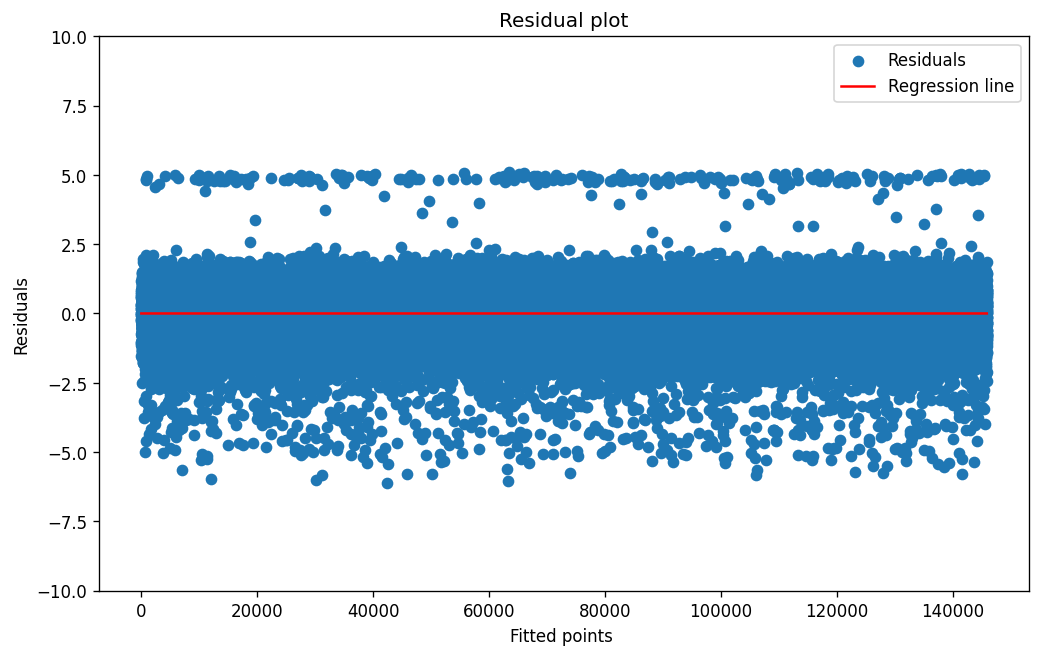

In [202]:
plt.figure (figsize = (10, 6), dpi = 120, facecolor = 'w', edgecolor = 'b')
f = range (0, 145865)
k = [0 for i in range (0, 145865)]
plt.scatter (f, residuals.residuals[:], label = 'Residuals')
plt.plot (f, k , color = 'red', label = 'Regression line' )
plt.xlabel ('Fitted points ')
plt.ylabel ('Residuals')
plt.title ('Residual plot')
plt.ylim (-10, 10)
plt.legend ()

**Ridge regularisation**

In [203]:
from sklearn.linear_model import Ridge

In [204]:
def ridge_regression (x_train, x_test, y_train, y_test, alpha):
    #Fit the model
    rmse_train = []
    rmse_test = []
    ridgereg_coef = []
    ridgereg_intercept = []
    for i in alpha:
      ridgereg = Ridge (alpha = i)
      ridgereg.fit (x_train, y_train)
      y_train_pred = ridgereg.predict (x_train)
      y_test_pred = ridgereg.predict (x_test)

      rmse_train.append (sqrt (mse (y_train, y_train_pred)))
      rmse_test.append (sqrt (mse (y_test, y_test_pred)))
      ridgereg_coef.append (ridgereg.coef_)
      ridgereg_intercept.append (ridgereg.intercept_)

    return (rmse_train, rmse_test, ridgereg_coef, ridgereg_intercept)

In [205]:
alpha_ridge = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
out = ridge_regression (x_train, x_test, y_train, y_test, alpha_ridge)
rmse_train = out[0]
rmse_test = out[1]
ridgereg_coef = out[2]
ridgereg_intercept = out[3]

In [206]:
alpha_df = pd.DataFrame (alpha_ridge, columns = ['Alpha'])
train_df = pd.DataFrame (rmse_train, columns = ['Train_error'])
test_df = pd.DataFrame (rmse_test, columns = ['Test_error'])
intercept_df = pd.DataFrame (ridgereg_intercept, columns = ['Intercept'])
df = pd.concat ([alpha_df, train_df, test_df, intercept_df], axis = 1)
c = 0
for i in range (0, 14):
  ridgereg = []
  for j in range (0, 11):
    ridgereg.append (ridgereg_coef[j][i])
  if i in [0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]:
    coef_df = pd.DataFrame (ridgereg, columns = [x_df.columns[c]])
    df = pd.concat ([df, coef_df], axis = 1)
    c += 1
df

,Alpha,Train_error,Test_error,Intercept,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_dayofweek,pickup_hour,pickup_minute
0,0,0.775803,0.778235,6.467815,1.008726e+12,-3.764914e+11,0.012153,0.103688,-0.081997,-0.008351,-0.069852,0.007390,0.037356,-0.023252,0.029319,-0.006392
1,5,0.775802,0.778223,6.467815,-5.991398e-03,-6.130964e-03,0.012295,0.103663,-0.081974,-0.008271,-0.069904,0.007429,0.037334,-0.023154,0.029297,-0.006196
2,10,0.775802,0.778223,6.467815,-5.991391e-03,-6.130945e-03,0.012295,0.103660,-0.081973,-0.008269,-0.069904,0.007429,0.037334,-0.023154,0.029296,-0.006196
3,15,0.775802,0.778223,6.467815,-5.991385e-03,-6.130925e-03,0.012295,0.103658,-0.081973,-0.008267,-0.069903,0.007429,0.037334,-0.023154,0.029296,-0.006196
4,20,0.775802,0.778223,6.467815,-5.991378e-03,-6.130905e-03,0.012295,0.103655,-0.081973,-0.008265,-0.069903,0.007429,0.037334,-0.023154,0.029296,-0.006196
5,25,0.775802,0.778223,6.467815,-5.991372e-03,-6.130886e-03,0.012294,0.103652,-0.081972,-0.008263,-0.069903,0.007429,0.037333,-0.023154,0.029296,-0.006196
6,30,0.775802,0.778223,6.467815,-5.991366e-03,-6.130866e-03,0.012294,0.103650,-0.081972,-0.008261,-0.069902,0.007429,0.037333,-0.023154,0.029296,-0.006196
7,35,0.775802,0.778223,6.467815,-5.991359e-03,-6.130847e-03,0.012294,0.103647,-0.081971,-0.008259,-0.069902,0.007429,0.037333,-0.023153,0.029296,-0.006196
8,40,0.775802,0.778224,6.467815,-5.991353e-03,-6.130827e-03,0.012294,0.103644,-0.081971,-0.008257,-0.069901,0.007429,0.037332,-0.023153,0.029295,-0.006196
9,45,0.775802,0.778224,6.467815,-5.991346e-03,-6.130807e-03,0.012294,0.103642,-0.081971,-0.008254,-0.069901,0.007428,0.037332,-0.023153,0.029295,-0.006196


**Check out the difference between the coefficients of ridge-regularised 'vector_id' and 'passenger_count'. There is a huge difference between them and the non-regularised (Alpha=0) coefficients**

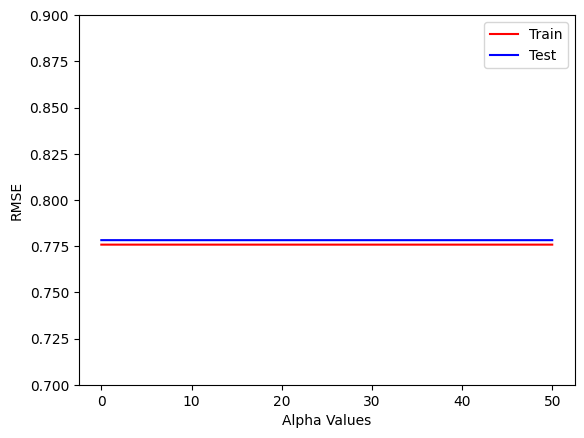

In [207]:
plt.plot (alpha_ridge, rmse_train, color = 'red')
plt.plot (alpha_ridge, rmse_test, color = 'blue')
plt.xlabel ('Alpha Values')
plt.ylabel ('RMSE')
plt.ylim (0.7, 0.9)
plt.legend (['Train', 'Test'])

**Lasso regularisation**

In [208]:
from sklearn.linear_model import Lasso

In [209]:
def lasso_regression (x_train, x_test, y_train, y_test, alpha):
    #Fit the model
    rmse_train = []
    rmse_test = []
    lassoreg_coef = []
    lassoreg_intercept = []
    for i in alpha:
      lassoreg = Lasso (alpha = i)
      lassoreg.fit (x_train, y_train)
      y_train_pred = lassoreg.predict (x_train)
      y_test_pred = lassoreg.predict (x_test)

      rmse_train.append (sqrt (mse (y_train, y_train_pred)))
      rmse_test.append (sqrt (mse (y_test, y_test_pred)))
      lassoreg_coef.append (lassoreg.coef_)
      lassoreg_intercept.append (lassoreg.intercept_)
      
    return (rmse_train, rmse_test, ridgereg_coef, ridgereg_intercept)

In [210]:
alpha_lasso = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
out = lasso_regression (x_train, x_test, y_train, y_test, alpha_lasso)
rmse_train = out[0]
rmse_test = out[1]
lassoreg_coef = out[2]
lassoreg_intercept = out[3]

<ipython-input-209-316a857ca0dc>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoreg.fit (x_train, y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.756e+05, tolerance: 3.671e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [211]:
alpha_df = pd.DataFrame (alpha_lasso, columns = ['Alpha'])
train_df = pd.DataFrame (rmse_train, columns = ['Train_error'])
test_df = pd.DataFrame (rmse_test, columns = ['Test_error'])
intercept_df = pd.DataFrame (lassoreg_intercept, columns = ['Intercept'])
df = pd.concat ([alpha_df, train_df, test_df, intercept_df], axis = 1)
c = 0
for i in range (0, 14):
  lassoreg = []
  for j in range (0, 11):
    lassoreg.append (lassoreg_coef[j][i])
  if i in [0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]:
    coef_df = pd.DataFrame (lassoreg, columns = [x_df.columns[c]])
    df = pd.concat ([df, coef_df], axis = 1)
    c += 1
df

,Alpha,Train_error,Test_error,Intercept,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_dayofweek,pickup_hour,pickup_minute
0,0,0.775802,0.778223,6.467815,1.008726e+12,-3.764914e+11,0.012153,0.103688,-0.081997,-0.008351,-0.069852,0.007390,0.037356,-0.023252,0.029319,-0.006392
1,1,0.793200,0.800835,6.467815,-5.991398e-03,-6.130964e-03,0.012295,0.103663,-0.081974,-0.008271,-0.069904,0.007429,0.037334,-0.023154,0.029297,-0.006196
2,2,0.793200,0.800835,6.467815,-5.991391e-03,-6.130945e-03,0.012295,0.103660,-0.081973,-0.008269,-0.069904,0.007429,0.037334,-0.023154,0.029296,-0.006196
3,3,0.793200,0.800835,6.467815,-5.991385e-03,-6.130925e-03,0.012295,0.103658,-0.081973,-0.008267,-0.069903,0.007429,0.037334,-0.023154,0.029296,-0.006196
4,4,0.793200,0.800835,6.467815,-5.991378e-03,-6.130905e-03,0.012295,0.103655,-0.081973,-0.008265,-0.069903,0.007429,0.037334,-0.023154,0.029296,-0.006196
5,5,0.793200,0.800835,6.467815,-5.991372e-03,-6.130886e-03,0.012294,0.103652,-0.081972,-0.008263,-0.069903,0.007429,0.037333,-0.023154,0.029296,-0.006196
6,6,0.793200,0.800835,6.467815,-5.991366e-03,-6.130866e-03,0.012294,0.103650,-0.081972,-0.008261,-0.069902,0.007429,0.037333,-0.023154,0.029296,-0.006196
7,7,0.793200,0.800835,6.467815,-5.991359e-03,-6.130847e-03,0.012294,0.103647,-0.081971,-0.008259,-0.069902,0.007429,0.037333,-0.023153,0.029296,-0.006196
8,8,0.793200,0.800835,6.467815,-5.991353e-03,-6.130827e-03,0.012294,0.103644,-0.081971,-0.008257,-0.069901,0.007429,0.037332,-0.023153,0.029295,-0.006196
9,9,0.793200,0.800835,6.467815,-5.991346e-03,-6.130807e-03,0.012294,0.103642,-0.081971,-0.008254,-0.069901,0.007428,0.037332,-0.023153,0.029295,-0.006196


**Check out the difference between the coefficients of lasso-regularised 'vector_id' and 'passenger_count'. There is a huge difference between them and the non-regularised (Alpha=0) coefficients**

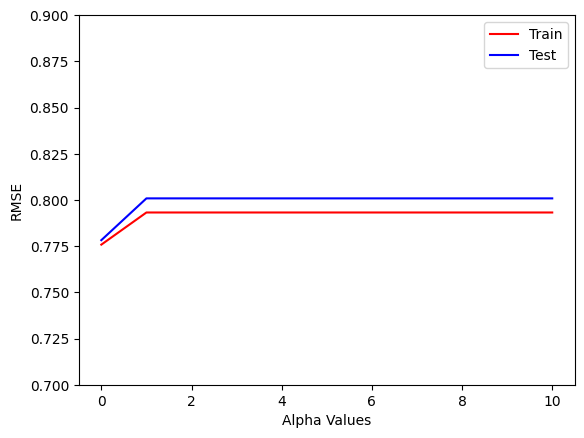

In [212]:
plt.plot (alpha_lasso, rmse_train, color = 'red')
plt.plot (alpha_lasso, rmse_test, color = 'blue')
plt.xlabel ('Alpha Values')
plt.ylabel ('RMSE')
plt.ylim (0.7, 0.9)
plt.legend (['Train', 'Test'])